In [331]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [332]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [333]:
data_path_test = '/content/drive/MyDrive/Colab Notebooks/test.csv'
data_path_train = '/content/drive/MyDrive/Colab Notebooks/train.csv'

datatrain = pd.read_csv(data_path_train)
datatrain.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [334]:
data_test = pd.read_csv(data_path_test)
id_test = data_test['PassengerId']
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [335]:
datatrain.shape

(891, 12)

In [336]:
data_test.shape

(418, 11)

In [337]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [338]:
datatrain.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [339]:
# podemos observar que solo Cabin y Age tienen valores nulos
datatrain.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [340]:
# vemos que Cabin tiene mas del 50% de valores nulos
datatrain.select_dtypes('object').isnull().sum()/len(datatrain)

Name        0.000000
Sex         0.000000
Ticket      0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [341]:
# hacemos nuestra seleccion de ingenieria de caracteristicas, 

def EngiFeature (file_path):
  dtrain = pd.read_csv(file_path)
  dtrain.drop(columns = 'Cabin', inplace = True) # eliminamos las columnas con mas del 50% de valores nulos
  dtrain.drop(columns = ['Name', 'PassengerId'], inplace = True) # eliminamos caracteristicas de alta cardinalidad
  dtrain.drop(columns = 'Fare', inplace = True) # Removemos la multicollinearidad
  cat_cols = dtrain.select_dtypes('object').drop(columns='Sex').columns.tolist() # removemos todas las caracteristicas categoricas
  dtrain.drop(columns = cat_cols, inplace = True)
  dtrain['Age'] = dtrain['Age'].fillna(dtrain['Age'].median()) # reemplazamos todos lo valores nulos con la media
  dtrain['Sex'] = dtrain['Sex'].replace({'female': 0, 'male': 1}) # Pasamos sexo a clase numerica
  return dtrain

dtrain = EngiFeature('/content/drive/MyDrive/Colab Notebooks/train.csv')
data_test = EngiFeature('/content/drive/MyDrive/Colab Notebooks/test.csv')




In [342]:
# mostramos nuestro dataset final
# tambien vemos que sibsp y parch estan sesgado, podemos transformarlos con log
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [343]:
# transformando con log
cols = ['Parch', 'SibSp']
for col in cols:
    dtrain[col] = np.log(dtrain[col] + 1)
    data_test[col] = np.log(data_test[col] + 1)

In [344]:
# escalamos la edad
ss = StandardScaler()
age =  np.asarray(dtrain['Age'])
age = age.reshape(-1, 1)
dtrain['Age'] = ss.fit_transform(age)
age_test =  np.asarray(data_test['Age'])
age_test = age_test.reshape(-1, 1)
data_test['Age'] = ss.fit_transform(age_test)

In [345]:
dtrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,-0.565736,0.693147,0.0
1,1,1,0,0.663861,0.693147,0.0
2,1,3,0,-0.258337,0.000000,0.0
3,1,1,0,0.433312,0.693147,0.0
4,0,3,1,0.433312,0.000000,0.0


In [346]:
# obtenemos nuestras entradas X y nuestra salida y
#X= dtrain.iloc[:, dtrain.columns !='Survived']
#y = dtrain.loc[:, 'Survived']

target = 'Survived'
X = dtrain.drop(columns = target)
y = dtrain[target]

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(f'Training Data Shape: {X_train.shape} , {y_train.shape}')
print(f'Validation Data Shape: {X_val.shape} , {y_val.shape}')

Training Data Shape: (712, 5) , (712,)
Validation Data Shape: (179, 5) , (179,)


In [373]:
# Oversampling
over_sampler = RandomOverSampler()
X_train_under, y_train_under = over_sampler.fit_resample(X_train, y_train)
print(f'Feature Matrix shape{X_train.shape}')
print(f'Target Vector shape{y_train.shape}')

Feature Matrix shape(712, 5)
Target Vector shape(712,)


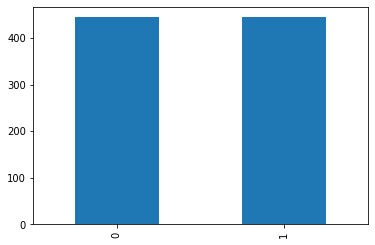

In [363]:
y_train_under.value_counts().plot(kind='bar')

In [349]:
# cargamos nuestro scaler
#std_scaler = StandardScaler()
#X = std_scaler.fit_transform(X)

In [370]:
# vemos que X ya no es una tabla, es un arreglo de numpy
#len(X_train_under)

888

In [374]:
# hacemos el despliegue y particionamos la data para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train_under, y_train_under, test_size = 0.20, random_state=42, shuffle = True )

In [375]:
# importamos KERA

import keras
import keras
from keras.models import Sequential
from keras.layers import Dense  

In [387]:
# vemos cuantas columnas tiene el problema origina
y_train_under.shape

(888,)

In [377]:
inputs = X_train.shape[1]
clasificador = Sequential()
clasificador.add(Dense(input_dim = inputs, units = 6, activation ='relu', kernel_initializer='uniform')) # capa 1
clasificador.add(Dense(units = 6, activation ='relu', kernel_initializer='uniform')) # capa 2
clasificador.add(Dense(units=1, activation = 'sigmoid', kernel_initializer='uniform')) # salida

In [393]:
clasificador.compile(optimizer = 'adam', loss='binary_crossentropy', metrics =['accuracy'])
clasificador.fit(X_train_under, y_train_under, batch_size =10, epochs = 100)


Epoch 1/100
89/89 [==============================] - 1s 2ms/step - loss: 0.4167 - accuracy: 0.8041
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8029
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8131
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8153
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8119
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8119
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8097
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4153 - accuracy: 0.8074
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8086
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8119
Epoch 11/

In [394]:
# Guardamos el primer Modelo creado
path = '/content/drive/MyDrive/Colab Notebooks/'
clasificador.save(path + 'Primer_Dadaset_Model1')


In [395]:
# cargamos nuestro primer modelo de  red neuronal creada
model1 = keras.models.load_model(path + 'Primer_Dadaset_Model1')
model1

In [396]:
y_pred = model1.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])


In [397]:
y_final

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1])